<a href="https://colab.research.google.com/github/Xexo-Alive/LumiBin/blob/main/Yolov8(medium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import torch
print("GPU Available: ", torch.cuda.is_available())
print("GPU Name: ", torch.cuda.get_device_name(0)
if torch.cuda.is_available()
else "No GPU found")

GPU Available:  True
GPU Name:  Tesla T4


In [ ]:
!ls /content/drive/MyDrive/

 Classroom
'Colab Notebooks'
 Data
 Dataset
 IMG20250308100131.jpg
 LumiBin
"mahika ma'am updated sheet.gsheet"
'Memories with og bhai log'
'Photos '
 runs
 Screenshot_2025-03-07-11-34-21-73_4336b74596784d9a2aa81f87c2016f50.jpg
 test2.jpg
 test5.jpg
 test.jpg
 TimeTable.gsheet
'WhatsApp Image 2025-02-21 at 06.49.17_f995dd4e.jpg'
 yolov8m.pt
'YOLO Waste Detection.v1i.yolov8.zip'


In [ ]:
!unzip "/content/drive/MyDrive/YOLO Waste Detection.v1i.yolov8.zip" -d "/content/drive/MyDrive/Dataset"

Archive:  /content/drive/MyDrive/YOLO Waste Detection.v1i.yolov8.zip
replace /content/drive/MyDrive/Dataset/README.roboflow.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls /content/drive/MyDrive/Dataset

data.yaml  README.roboflow.txt	test  train  valid


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!cat /content/drive/MyDrive/Dataset/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 42
names: ['Aerosols', 'Aluminum can', 'Aluminum caps', 'Cardboard', 'Cellulose', 'Ceramic', 'Combined plastic', 'Container for household chemicals', 'Disposable tableware', 'Electronics', 'Foil', 'Furniture', 'Glass bottle', 'Iron utensils', 'Liquid', 'Metal shavings', 'Milk bottle', 'Organic', 'Paper', 'Paper bag', 'Paper cups', 'Paper shavings', 'Papier mache', 'Plastic bag', 'Plastic bottle', 'Plastic can', 'Plastic canister', 'Plastic caps', 'Plastic cup', 'Plastic shaker', 'Plastic shavings', 'Plastic toys', 'Postal packaging', 'Printing industry', 'Scrap metal', 'Stretch film', 'Tetra pack', 'Textile', 'Tin', 'Unknown plastic', 'Wood', 'Zip plastic bag']

roboflow:
  workspace: wastedetection-ze5uz
  project: yolo-waste-detection-8dvx8
  version: 1
  license: CC BY 4.0
  url: https://app.roboflow.com/wastedetection-ze5uz/yolo-waste-detection-8dvx8/1

In [ ]:
model = YOLO("yolov8n.pt")  # Load pre-trained model
model.train(data="/content/drive/MyDrive/Dataset/data.yaml", epochs=50, imgsz=640)

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

train: Scanning /content/drive/MyDrive/Dataset/train/labels.cache... 3822 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3822/3822 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Dataset/valid/labels.cache... 1092 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1092/1092 [00:00<?, ?it/s]

Plotting labels to runs/detect/train2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000217, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.293      4.514      1.654         63        640:   1%|          | 2/239 [00:29<58:30, 14.81s/it]

In [ ]:
model_path = "/content/drive/MyDrive/runs/yolov8m.pt"

In [ ]:
import os

In [ ]:
if os.path.exists(model_path):
    print(" Model found!")
else:
    print(" Model not found! Check the path.")

 Model found!



image 1/1 /content/drive/MyDrive/Dataset/test/images/00a6aeda-R_2700_jpg.rf.0ac0c179c64ec5d8e407eac11b806e7d.jpg: 640x640 1 cup, 40.6ms
Speed: 9.9ms preprocess, 40.6ms inference, 379.9ms postprocess per image at shape (1, 3, 640, 640)


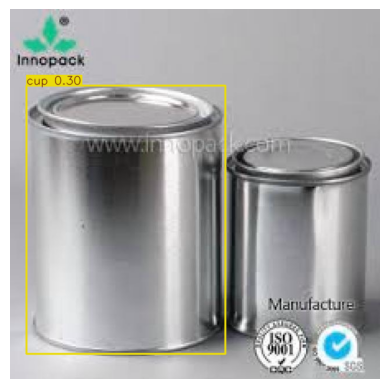

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("/content/drive/MyDrive/runs/yolov8m.pt")

image_path = "/content/drive/MyDrive/dataset/train/images/0a2ee42d-AluCan472_jpg.rf.2501f509171e6116960883b9c1899a7e.jpg"

results = model("/content/drive/MyDrive/Dataset/test/images/00a6aeda-R_2700_jpg.rf.0ac0c179c64ec5d8e407eac11b806e7d.jpg")  # No need for 'save=True' unless you want to save outputs

for r in results:
    im_array = r.plot()
    plt.imshow(im_array)
    plt.axis("off")
    plt.show()


image 1/1 /content/drive/MyDrive/WhatsApp Image 2025-02-21 at 06.49.17_f995dd4e.jpg: 640x480 2 bottles, 1 chair, 1 potted plant, 1 dining table, 28.9ms
Speed: 2.9ms preprocess, 28.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


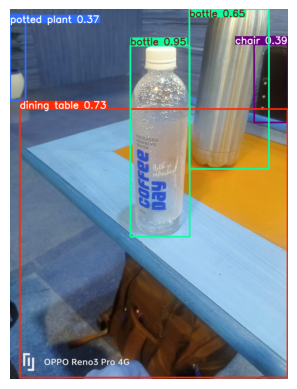

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("/content/drive/MyDrive/runs/yolov8m.pt")

image_path = "/content/drive/MyDrive/WhatsApp Image 2025-02-21 at 06.49.17_f995dd4e.jpg"

results = model("/content/drive/MyDrive/WhatsApp Image 2025-02-21 at 06.49.17_f995dd4e.jpg")

for r in results:
    im_array = r.plot()
    plt.imshow(im_array)
    plt.axis("off")
    plt.show()


image 1/1 /content/drive/MyDrive/test.jpg: 512x640 10 persons, 1 backpack, 1 handbag, 3 bottles, 18 chairs, 1 potted plant, 1 dining table, 1 tv, 6 laptops, 1 mouse, 1 remote, 1 book, 29.5ms
Speed: 3.6ms preprocess, 29.5ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)


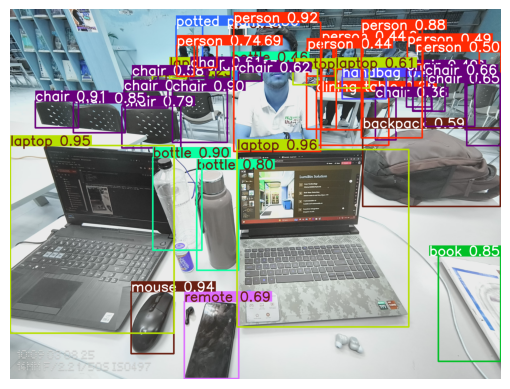

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("/content/drive/MyDrive/runs/yolov8m.pt")

image_path = "/content/drive/MyDrive/test.jpg"

results = model("/content/drive/MyDrive/test.jpg")

for r in results:
    im_array = r.plot()
    plt.imshow(im_array)
    plt.axis("off")
    plt.show()


image 1/1 /content/drive/MyDrive/test5.jpg: 512x640 14 persons, 1 bottle, 7 chairs, 1 tv, 6 laptops, 3 mouses, 1 keyboard, 1 cell phone, 56.6ms
Speed: 13.0ms preprocess, 56.6ms inference, 332.9ms postprocess per image at shape (1, 3, 512, 640)


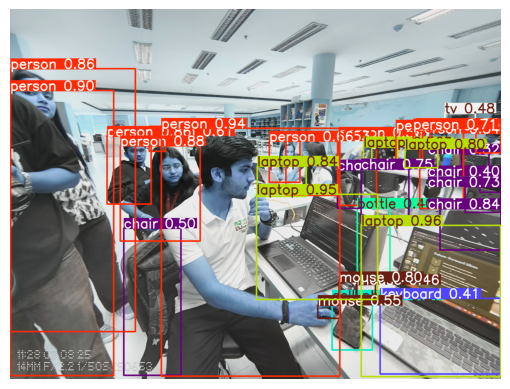

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("/content/drive/MyDrive/runs/yolov8m.pt")

image_path = "/content/drive/MyDrive/test5.jpg"

results = model("/content/drive/MyDrive/test5.jpg")

for r in results:
    im_array = r.plot()
    plt.imshow(im_array)
    plt.axis("off")
    plt.show()

In [ ]:
!pip install --upgrade pip setuptools wheel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
!apt-get update
!apt-get install -y python3-dev python3-pip libffi-dev libssl-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,369 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,667 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-s

In [ ]:
!pip install greenlet
!pip install gevent

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 59.4 MB/s eta 0:00:00


In [ ]:
!pip install --pre gevent

In [ ]:
!apt-get install -y libasound2-dev
!pip install python-rtmidi

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libasound2-dev is already the newest version (1.2.6.1-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [ ]:
!pip install onnx onnxruntime-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 58.4 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/runs/yolov8m.pt")

model.export(format="onnx", dynamic=True)

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)
YOLOv8m summary (fused): 92 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/runs/yolov8m.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (49.7 MB)
requirements: Ultralytics requirement ['onnxslim'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 1.6s, installed 1 package: ['onnxslim']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 37.9s, saved as '/content/drive/MyDrive/runs/yolov8m.onnx' (98.9 MB)

Export complete (45.6s)
Results saved to /content/drive/MyDrive/runs
Predict:         yolo predict task=detect model=/content/drive/MyDrive/runs/yolov8m.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/drive/MyDrive/runs/yolov8m.onnx imgsz=640

'/content/drive/MyDrive/runs/yolov8m.onnx'

In [ ]:
from google.colab import files
files.download("/content/drive/MyDrive/runs/yolov8m.onnx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>